# Day20 Airbnb in Berlin 1/5 booking rate 
# 柏林Airbnb 1/5 訂房率

今天從[Inside Airbnb](http://insideairbnb.com/get-the-data.html)下載的資料(calendar.csv)，針對德國柏林地區的Airbnb房源繁忙程度作分析。

The data (calendar.csv) was collected from [Inside Airbnb](http://insideairbnb.com/get-the-data.html), the data was last updated on 11/07/2019.
Today's article will briefly analysise the booking rate of Airbnb listings in Berlin.
![Title](2001.JPG)

### 載入常用套件並讀入我們要分析的資料
### First, we need to import the packeges we need and read in the data we are about to analyse.

In [1]:
# 載入所需套件 import the packages we need
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly as py # 畫互動式圖表的開源套件 graphing library makes interactive graphs
import warnings # 忽略警告 ignore warnings
warnings.filterwarnings("ignore")

In [2]:
calendar = pd.read_csv('airbnb/calendar.csv') # 讀入要分析的檔案 read in the file we want to analyse
print('There are',calendar.date.nunique(), 'days and', calendar.listing_id.nunique(),'different listings in the calendar.')
print('Date from', calendar.date.min(), 'to', calendar.date.max()) # 看資料日期分布區間 chekc the time frame of our date
calendar.head() # 印出資料前五筆 print out the top 5 rows of our data

There are 365 days and 24395 different listings in the calendar.
Date from 2019-07-11 to 2020-07-09


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1944,2019-07-11,f,$20.00,$20.00,120,120
1,159454,2019-07-11,f,$161.00,$161.00,2,730
2,159454,2019-07-12,f,$161.00,$161.00,2,730
3,159454,2019-07-13,f,$161.00,$161.00,2,730
4,159454,2019-07-14,f,$161.00,$161.00,2,730


(array([0, 1]), <a list of 2 Text xticklabel objects>)

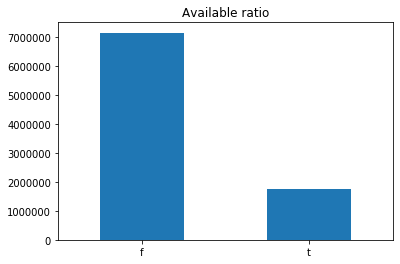

In [3]:
# 算資料中available欄位 f(未被預訂)與t(已被預訂)數量並畫圖，繪圖類型長條圖，並在圖上加上標題。
# count the number of f(not reserved) and t(reserved) of the column 'available'
calendar.available.value_counts().plot(kind='bar', title='Available ratio') 
plt.xticks(rotation=0) # x軸旋轉角度設定為0 set the rotation angle of x ticks to zero

In [4]:
new_calendar = calendar[['date', 'available']] # 只抓出日期與是否已被預訂新建為一個dataframe create a new data frame with only 'date' and 'available' column
new_calendar['busy'] = new_calendar.available.map(lambda x:0 if x == 't' else 1) # 進行標籤編碼 label encoding
new_calendar = new_calendar.groupby('date')['busy'].mean().reset_index() 
new_calendar.head() # 看一眼我們新建的dataframe have a look of our new dataframe

,date,busy
0,2019-07-11,0.945891
1,2019-07-12,0.916089
2,2019-07-13,0.903792
3,2019-07-14,0.877721
4,2019-07-15,0.879934


## 轉換時間格式 Change the format of the date

Text(0, 0.5, '%Busy')

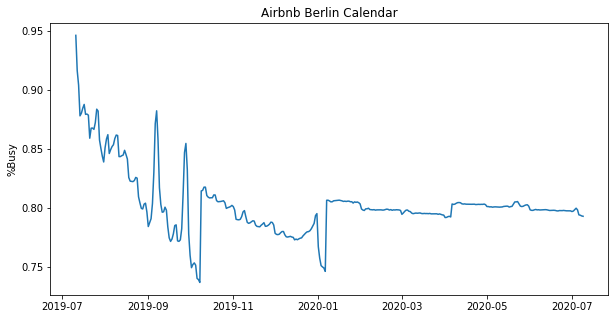

In [5]:
new_calendar['date'] = pd.to_datetime(new_calendar['date']) # 轉換時間格式 change the format of the date

plt.figure(figsize=(10, 5))
plt.plot(new_calendar['date'], new_calendar['busy'])
plt.title('Airbnb Berlin Calendar')
plt.ylabel('%Busy')

## 處理價格資料 Clean the price data

Text(0, 0.5, 'Month')

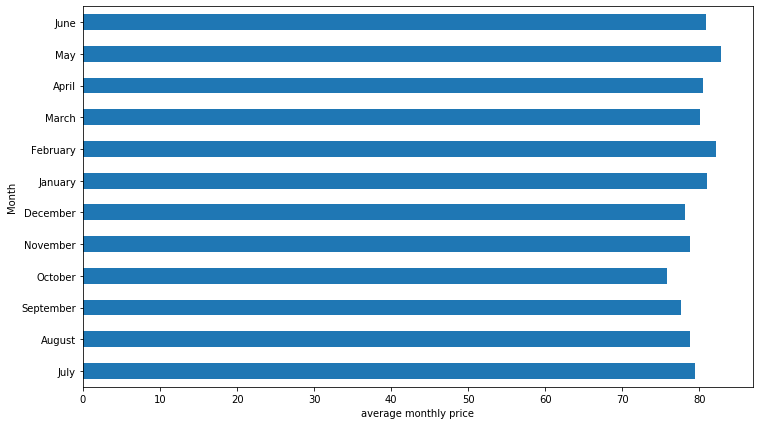

In [6]:
# 處理價格資料 clean the price data
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['price'] = calendar['price'].str.replace(',', '').str.replace('$', '').astype(float)

mean_of_month = calendar.groupby(calendar['date'].dt.strftime('%B'), sort=False)['price'].mean()

mean_of_month.plot(kind='barh', figsize=(12, 7))
plt.xlabel('average monthly price')
plt.ylabel('Month')

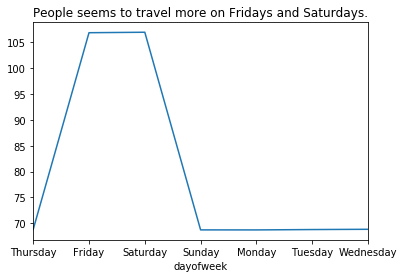

In [7]:
calendar['dayofweek'] = calendar.date.dt.weekday_name
cats = calendar.dayofweek.unique().tolist()
price_week = calendar.groupby('dayofweek')['price'].mean().reindex(cats)
price_week.plot(title='People seems to travel more on Fridays and Saturdays.')

## 小結 Summary
在我們分析的2019-07-11到2020-07-09區間，柏林地區Airbnb房源五月、二月價格較其他月份稍偏高，十月則最低。周五與週六訂房率較多。<br>
From 2019-07-11 to 2020-07-09, the price of Airbnb in Berlin in February and May is slightly higher than other months yet the price in October is a little lower. There are more bookings on Fridays and Saturdays.

文中若有錯誤還望不吝指正，感激不盡。
Please let me know if there’s any mistake in this article. Thanks for reading.

Reference 參考資料：

[1] [Inside Airbnb](http://insideairbnb.com/get-the-data.html)

[2] [利用Airbnb來更了解居住城市，以臺北為例 Python實作（上）](https://medium.com/finformation%E7%95%B6%E7%A8%8B%E5%BC%8F%E9%81%87%E4%B8%8A%E8%B2%A1%E5%8B%99%E9%87%91%E8%9E%8D/%E5%88%A9%E7%94%A8airbnb%E4%BE%86%E6%9B%B4%E4%BA%86%E8%A7%A3%E5%B1%85%E4%BD%8F%E5%9F%8E%E5%B8%82-%E4%BB%A5%E8%87%BA%E5%8C%97%E7%82%BA%E4%BE%8B-python%E5%AF%A6%E4%BD%9C-3f4903e8742)
